In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package so that objects can be saved on disk
import pickle

In [2]:
x1 = np.asanyarray([0.5, 3.4, 2.4, 5.6, 7, 8.2,-1.5]); x2 = np.asanyarray([2.3, 2, 1.4, 6, 8, 5.6, 0.5]) 
y = np.asanyarray([-1, -1, -1, 1, 1, 1,-1])
idvs = np.array([x1,x2]).transpose()
dataa = pd.DataFrame({'X1': x1, 'X2': x2, 'Y': y})
dataa

,X1,X2,Y
0,0.5,2.3,-1
1,3.4,2.0,-1
2,2.4,1.4,-1
3,5.6,6.0,1
4,7.0,8.0,1
5,8.2,5.6,1
6,-1.5,0.5,-1


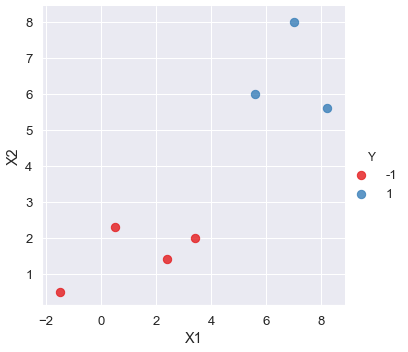

In [3]:
# Plotting
sns.lmplot('X1', 'X2', data=dataa, hue='Y',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [4]:
model = svm.SVC(kernel='linear')
model.fit(idvs, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 9)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

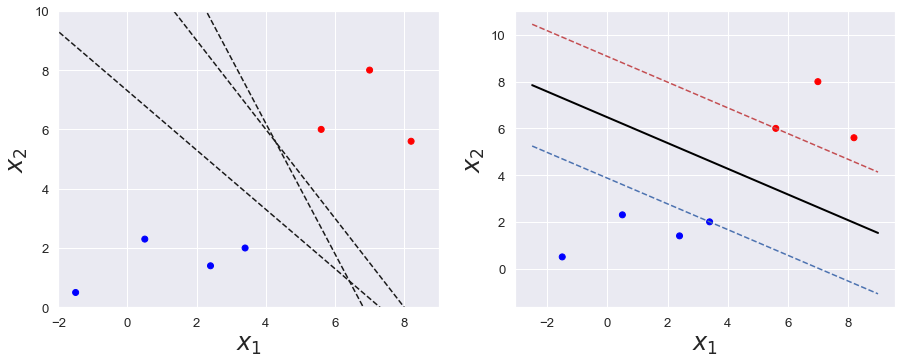

In [10]:
plt.figure(figsize = (15,12))
plt.subplot(221)
plt.scatter(x1,x2, c=y, cmap=plt.cm.bwr)
plt.plot(xx, -xx+7.3, '--k')
plt.plot(xx, -1.5*xx+12, 'k--')
plt.plot(xx, -2.2*xx+15, 'k--')
plt.xlim([-2, 9])
plt.ylim([0, 10])
plt.ylabel('$x_2$', fontsize = 24)
plt.xlabel('$x_1$', fontsize = 24)


plt.subplot(222)
plt.scatter(x1,x2, c=y, cmap=plt.cm.bwr)
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'b--')
plt.plot(xx, yy_up, 'r--')
plt.ylabel('$x_2$', fontsize = 24)
plt.xlabel('$x_1$', fontsize = 24)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

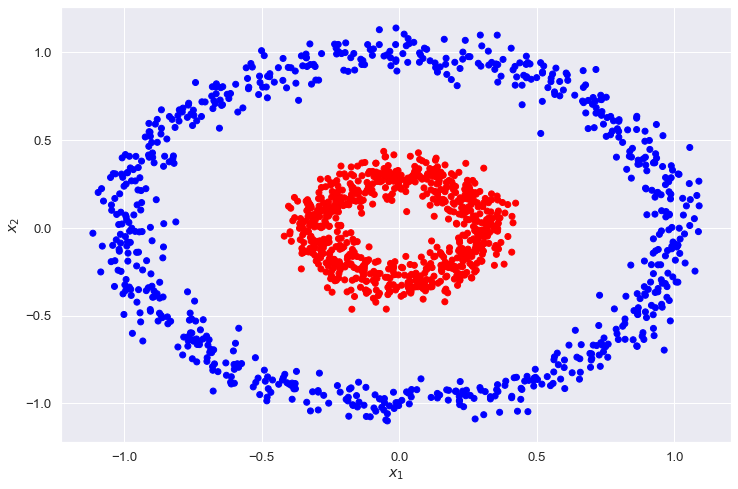

In [31]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1500, noise=0.06, factor=0.3, random_state=0)
plt.figure(figsize = (12,8))
plt.scatter(*X.T, c=y, cmap=plt.cm.bwr)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

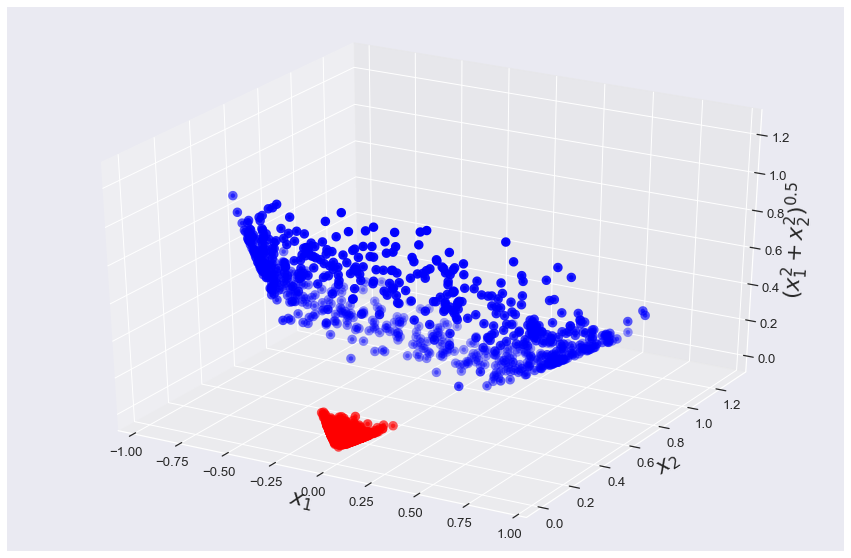

In [76]:
from mpl_toolkits.mplot3d import Axes3D

z1= np.sqrt(2)*X.T[0] * X.T[1]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
XX, YY = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
ZZ = 0.55*np.ones((100, 100))

ax.scatter(z1,X.T[1]**2, X.T[0]**2,linewidths= 5 ,c=y, cmap=plt.cm.bwr)
#ax.plot_surface(XX, YY, ZZ, alpha=0.7)

ax.set_xlabel('$x_1$', size =22)
ax.set_ylabel('$x_2$', size =22)
ax.set_zlabel('$(x_1^2 + x_2^2)^{0.5}$', size =22)
#ax.legend(loc='best',fontsize = 'xx-large')


plt.show()

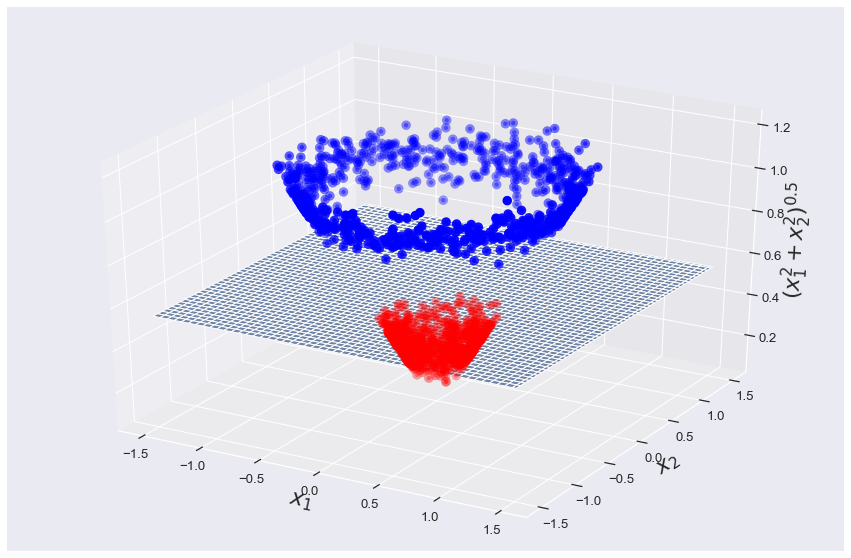

In [68]:
from mpl_toolkits.mplot3d import Axes3D

z= np.sqrt(X.T[0]**2 + X.T[1]**2)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
XX, YY = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
ZZ = 0.55*np.ones((100, 100))

ax.scatter(X.T[0], X.T[1], z,linewidths= 5 ,c=y, cmap=plt.cm.bwr)
ax.plot_surface(XX, YY, ZZ, alpha=0.7)

ax.set_xlabel('$x_1$', size =22)
ax.set_ylabel('$x_2$', size =22)
ax.set_zlabel('$(x_1^2 + x_2^2)^{0.5}$', size =22)
#ax.legend(loc='best',fontsize = 'xx-large')


plt.show()

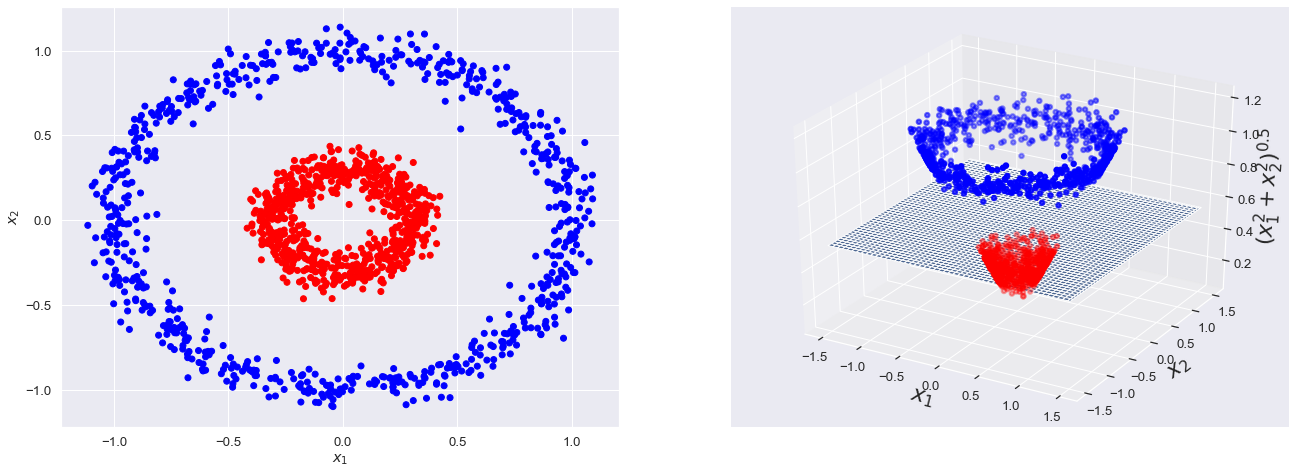

In [72]:

# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=(22,17))
#g=plt.figure(figsize = (8,7))
# First subplot
ax = fig.add_subplot(2, 2, 1)

ax.scatter(*X.T, c=y, cmap=plt.cm.bwr)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');


# Second subplot
ax = fig.add_subplot(2, 2, 2, projection='3d')

ax.scatter(X.T[0], X.T[1], z,linewidths= 2 ,c=y, cmap=plt.cm.bwr)
ax.plot_surface(XX, YY, ZZ, alpha=0.9)

ax.set_xlabel('$x_1$', size =22)
ax.set_ylabel('$x_2$', size =22)
ax.set_zlabel('$(x_1^2 + x_2^2)^{0.5}$', size =22)

plt.show()